In [1]:
import json
#/Users/dsalins/Downloads/moves_export/json/full/places.json
#/Users/dsalins/Downloads/moves_export/json/full/storyline.json
#/Users/dsalins/Downloads/moves_export/json/full/summary.json
infile_path = '/Users/dsalins/Downloads/moves_export/json/full/activities2.json'
outfile_path = '/Users/dsalins/Downloads/moves_export/json/full/activities2_out.csv'
infile = open(infile_path, 'r')
temp = json.load(infile)
infile.close()
temp[1]

outfile = open(outfile_path, 'w+')

for row in temp:
    date = row['date']
    if str(row['summary']) != 'null':
        try:
            summary_activity = row['summary'][0]['activity']
            summary_group = row['summary'][0]['group']
            summary_distance = row['summary'][0]['distance']
            summary_duration = row['summary'][0]['duration']
            try:
                summary_steps = row['summary'][0]['steps']
            except:
                pass
        except:
            pass
        
        if str(row['segments']) != 'null':
            for activity_segment in row['segments']:
                activity_segment_startTime = activity_segment['startTime']
                activity_segment_lastUpdate = activity_segment['lastUpdate']
                for activityDetail in activity_segment['activities']:
                    activityDetail_activity = activityDetail['activity']
                    activityDetail_manual = bool(activityDetail['manual'])
                    activityDetail_startTime = activityDetail['startTime']
                    activityDetail_group = activityDetail['group']
                    activityDetail_endTime = activityDetail['endTime']
                    activityDetail_duration = activityDetail['duration']
                    activityDetail_distance =activityDetail['distance']
                    try:
                        activityDetail_steps = activityDetail['steps']
                    except:
                        pass
                    #print(activityDetail)

#type:string
#start_day_time:timestamp
#end_day_time:timestamp
#activity:string
#group:string
#duration:float
#distance:float
#steps:float
#manual:bool
#calories:float



IOError: [Errno 2] No such file or directory: '/Users/dsalins/Downloads/moves_export/json/full/activities2.json'

In [2]:
import csv
import pandas as pd
import numpy
import pylab
import matplotlib.pyplot as plt

%matplotlib inline

google_hr = []
basis_hr = []
time = []

with open('Google_Basis_2.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=',')
     for row in spamreader:
        if row[28] != "null":
            time.append(row[0])
            google_hr.append(float(row[7]))
            basis_hr.append(float(row[28]))        

# temperature vs ice_cream, fill the series
google = pd.Series(google_hr)
basis = pd.Series(basis_hr)

pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 400)
pd.set_option('display.mpl_style', 'default')

import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

Plotting...


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


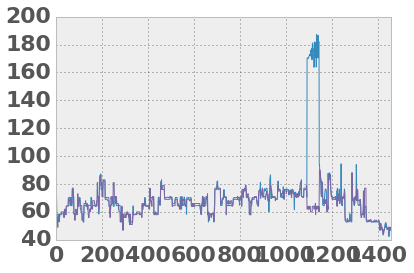

In [3]:
print("Plotting...")
google.plot()
basis.plot()

In [2]:
import bq

query = """SELECT * FROM [wearable.mpsnyder_gdevice_all] 
JOIN EACH [wearable.mps_basis_all] 
  ON [wearable.mps_basis_all.time] == [wearable.mpsnyder_gdevice_all.sample_time.timestamp] 
WHERE pulse_rate.beats_per_min >= 0 && hr >= 0
ORDER BY wearable.mpsnyder_gdevice_all.sample_time.timestamp DESC 
LIMIT 10000;"""

ImportError: No module named google.apputils

In [2]:
import httplib2
from apiclient.discovery import build
from oauth2client.client import flow_from_clientsecrets
from oauth2client.file import Storage
from oauth2client import tools

class BigQueryClient(object):
     def __init__(self):
         self.client_secret_path = '/Users/dsalins/Documents/SVNRepositories/Stanford_Wearables/client_secret.json'
    
     def bigquery_setup(self):
         FLOW = flow_from_clientsecrets(self.client_secret_path, scope='https://www.googleapis.com/auth/bigquery.readonly')
        
         storage = Storage('bigquery_credentials.dat')
         credentials = storage.get()
        
         if credentials is None or credentials.invalid:
             #Run oauth2 flow with default arguments.
             credentials = tools.run_flow(FLOW, storage, tools.argparser.parse_args([]))
        
         http = httplib2.Http()
         http = credentials.authorize(http)
        
         bigquery_service = build('bigquery', 'v2', http=http)
         return bigquery_service

class BigQuery(object):
     def __init__(self, project_number):
         client = BigQueryClient()
         self.service = client.bigquery_setup()
         self.project_number = project_number
         
     def execute_query(self, query):
         query_request = self.service.jobs()
         query_response = query_request.query(projectId=self.project_number, body=query).execute()
         return query_response


query = {'query':'SELECT TOP(title, 10) as title, COUNT(*) as revision_count FROM [publicdata:samples.wikipedia] WHERE wp_namespace = 0;'}
PROJECT_NUMBER = '948424156004'

bq = BigQuery(project_number=PROJECT_NUMBER)
response = bq.execute_query(query)
print(response)

InvalidClientSecretsError: File not found: "/Users/dsalins/Documents/SVNRepositories/wearables/client_secret.json"

In [7]:
import ssl
import pip

def install(package):
    pip.main(['install', package, '--upgrade'])

# Example
if __name__ == '__main__':
    install('pandas')

/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


Requirement already up-to-date: pandas in /Users/dsalins/Documents/SVNRepositories/wearables


/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


Requirement already up-to-date: python-dateutil in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from pandas)


/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


Requirement already up-to-date: pytz>=2011k in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from pandas)


/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available

Requirement already up-to-date: numpy>=1.7.0 in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from pandas)


/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/Users/dsalins/wearables/lib/python2.7/site-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:79: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


Requirement already up-to-date: six>=1.5 in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages (from python-dateutil->pandas)
